In [1]:
import pandas as pd
import numpy as np
import json

In [2]:
# this is in my google docs!

vals = pd.read_excel("/Users/will/Downloads/Rache LED dress mapping 2024.xlsx", sheet_name='2024').iloc[2:].values

In [3]:
pixels = []

for col in range(vals.shape[1]):
    for row in range(vals.shape[0]):
        x = col / vals.shape[1]
        y = row / vals.shape[0]
        v = vals[row, col]
        if isinstance(v, int) or (isinstance(v, float) and not np.isnan(v)):
            pixels.append([col, row, int(v)])

pixel_df = pd.DataFrame(pixels, columns=['x', 'y', 'n'])
#pixel_df = pixel_df.head(200)

num_pixels = len(pixel_df)
# adding in an offset to put the join under the arm 
# pixel_df['n'] = pixel_df['n'].apply(lambda n: (n - 127) % num_pixels)

# I think this line just rotates everything around the cylinder by 15 pixels to try and make the patterns join under the arm...
#pixel_df['x'] = pixel_df['x'].apply(lambda x: (x-15) % max(pixel_df['x']) + 1)
pixel_df['x'] = pixel_df['x'].apply(lambda x: (x-10) % (max(pixel_df['x']) + 1))
pixel_df = pixel_df.sort_values('n')
pixel_df['c'] = 'blue'
pixel_df.loc[pixel_df.n == 0, 'c'] = 'red'

<AxesSubplot:xlabel='x', ylabel='y'>

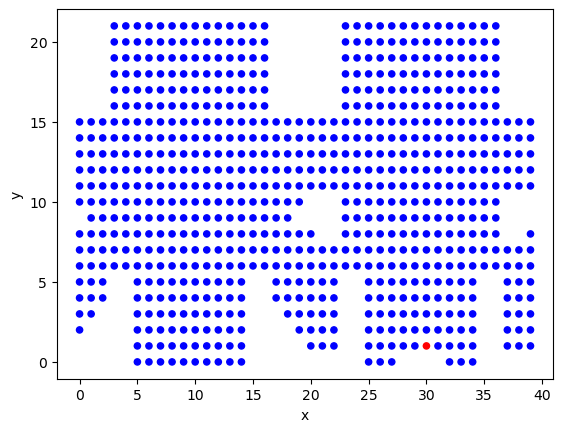

In [4]:
pixel_df.plot.scatter(x='x', y='y', c='c')



In [5]:
pixel_df

,x,y,n,c
0,30,1,0,red
1,30,2,1,blue
2,30,3,2,blue
3,30,4,3,blue
4,30,5,4,blue
...,...,...,...,...
566,22,5,709,blue
565,22,4,710,blue
564,22,3,711,blue
563,22,2,712,blue


In [6]:
print(json.dumps([[int(r['x']), int(r['y'])] for _, r in pixel_df.sort_values('n').iterrows()]))


[[30, 1], [30, 2], [30, 3], [30, 4], [30, 5], [30, 6], [30, 7], [30, 8], [30, 9], [30, 10], [30, 11], [30, 12], [30, 13], [30, 14], [30, 15], [30, 16], [30, 17], [30, 18], [30, 19], [30, 20], [30, 21], [31, 21], [31, 20], [31, 19], [31, 18], [31, 17], [31, 16], [31, 15], [31, 14], [31, 13], [31, 12], [31, 11], [31, 10], [31, 9], [31, 8], [31, 7], [31, 6], [31, 5], [31, 4], [31, 3], [31, 2], [31, 1], [32, 0], [32, 1], [32, 2], [32, 3], [32, 4], [32, 5], [32, 6], [32, 7], [32, 8], [32, 9], [32, 10], [32, 11], [32, 12], [32, 13], [32, 14], [32, 15], [32, 16], [32, 17], [32, 18], [32, 19], [32, 20], [32, 21], [33, 21], [33, 20], [33, 19], [33, 18], [33, 17], [33, 16], [33, 15], [33, 14], [33, 13], [33, 12], [33, 11], [33, 10], [33, 9], [33, 8], [33, 7], [33, 6], [33, 5], [33, 4], [33, 3], [33, 2], [33, 1], [33, 0], [34, 0], [34, 1], [34, 2], [34, 3], [34, 4], [34, 5], [34, 6], [34, 7], [34, 8], [34, 9], [34, 10], [34, 11], [34, 12], [34, 13], [34, 14], [34, 15], [34, 16], [34, 17], [34, 18

In [7]:
pixel_df.shape


(714, 4)